In [1]:
!pip install numpy pandas matplotlib scikit-learn

!pip install numpy pandas matplotlib scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv('iris.csv')
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    str    
dtypes: float64(4), str(1)
memory usage: 6.0 KB
None


In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [7]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
53,5.5,2.3,4.0,1.3,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa
144,6.7,3.3,5.7,2.5,Iris-virginica
3,4.6,3.1,1.5,0.2,Iris-setosa
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
# check for missing value
print(df.isnull())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            False         False          False         False    False
1            False         False          False         False    False
2            False         False          False         False    False
3            False         False          False         False    False
4            False         False          False         False    False
..             ...           ...            ...           ...      ...
145          False         False          False         False    False
146          False         False          False         False    False
147          False         False          False         False    False
148          False         False          False         False    False
149          False         False          False         False    False

[150 rows x 5 columns]


In [10]:
print(df.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [11]:
counts=df["Species"].value_counts()
print(counts)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


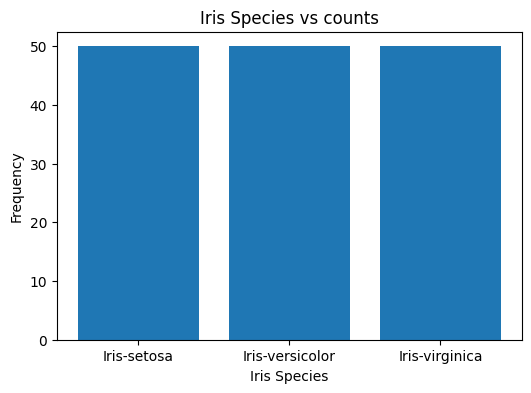

In [12]:
counts=df["Species"].value_counts()
plt.figure(figsize=(6,4))
plt.bar(x=counts.index,height=counts.values)
plt.xlabel("Iris Species")
plt.ylabel("Frequency")
plt.title("Iris Species vs counts")
plt.savefig("Iris Species vs counts.svg",format="svg")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#split the data set into x and y
X=df.drop(columns=['Species'])
Y=df['Species']
X_train, X_test , Y_train, Y_test=train_test_split(
    X,Y, test_size=0.2, random_state=42  #0.2 means 20% in test
)
print(f"Length of X_train and Y_train={X_train.shape}{Y_train.shape}")
print(f"Length of X_test and Y_test={X_test.shape}{Y_test.shape}")

Length of X_train and Y_train=(120, 4)(120,)
Length of X_test and Y_test=(30, 4)(30,)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [16]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_preds=knn.predict(X_test)
print(f"Accuracy ={accuracy_score(Y_test,Y_preds)}")
print(f"Classification Report \n {classification_report(Y_test,Y_preds)}")

Accuracy =1.0
Classification Report 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



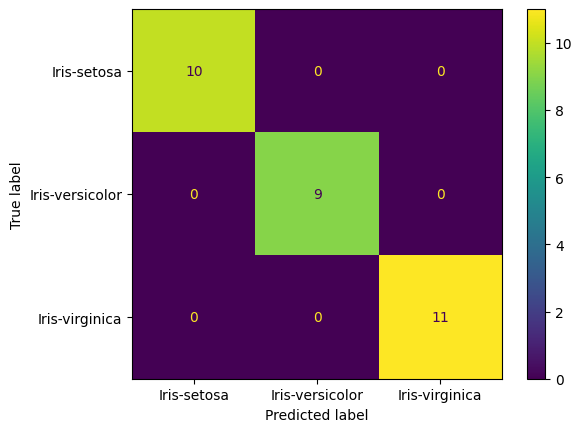

In [17]:
cm=confusion_matrix(Y_test,Y_preds)
cm_plot=ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=df['Species'].unique()
)
cm_plot.plot()
plt.savefig('cm.png')
plt.savefig('cm.svg',format="svg")
plt.show()

In [18]:
import joblib
joblib.dump(knn,"knn_model.joblib")
print("SUCCESS")

SUCCESS


In [19]:
sample=X_test.sample()
print(sample)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
145            6.7           3.0            5.2           2.3


In [20]:
#prediction
sample=X_test.sample()
sample_preds=knn.predict(sample)
print(sample_preds[0])

Iris-virginica
